In [1]:
INPUT_FILE = "day12.txt"

In [2]:
with open(INPUT_FILE) as f:
    lines = [s.strip() for s in f.readlines()]

# Part 1

In [3]:
lines[:4]

['initial state: ##.#.####..#####..#.....##....#.#######..#.#...........#......##...##.#...####..##.#..##.....#..####',
 '',
 '#..#. => #',
 '.###. => .']

In [4]:
PADDING = 1000

In [5]:
start_state = lines[0].split()[2]

print(len(start_state))
start_state = ("." * PADDING) + start_state +  ("." * PADDING)
print(len(start_state))

state_changes = {}
for l in lines[2:]:
    x, y = l.split("=>")
    state_changes[x.strip()] = y.strip()

100
2100


In [6]:
def next_(current, state_changes):
    next_state = ["."]*len(current)
    for i in range(0, len(current) - 4):
        arrangement = current[i:i + 5]
        if arrangement in state_changes:
            next_state[i+2] = state_changes[arrangement]
    
    return "".join(next_state)

def score(state, start_idx):
    i = start_idx
    s = 0
    for k in state:
        if k == '#':
            s += i
        i += 1

    return s

def next_after_k(state, k):
    for i in range(k):
        state = next_(state, state_changes)
    return state

In [7]:
start_state, score(start_state, -PADDING)

('......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [8]:
score(next_after_k(start_state, 20), -PADDING)

3798

# Part 2

In [9]:
PAD = 10

In [10]:
start_state = lines[0].split()[2]
start_state = "."*PAD + start_state + "."*PAD

In [11]:
state = start_state
first_plant = []
last_plant = []
scores = []

start_idx = -PAD
for i in range(20000):
    first_plant.append(state.index("#"))
    last_plant.append(state.rfind("#"))
    state = next_(state, state_changes)

    lfind = state.index("#")
    if lfind < PAD:
        state = "."*(PAD-lfind) + state
        start_idx -= (PAD-lfind)
    elif lfind > PAD:
        state = state[lfind - PAD:]
        start_idx += (lfind - PAD)
    
    rfind = state.rfind("#")
    if len(state) - rfind < PAD:
        state = state + "." * (PAD - len(state) + rfind)
        
    scores.append(score(state, start_idx))

print(len(state))

165


In [12]:
import matplotlib.pyplot as plt

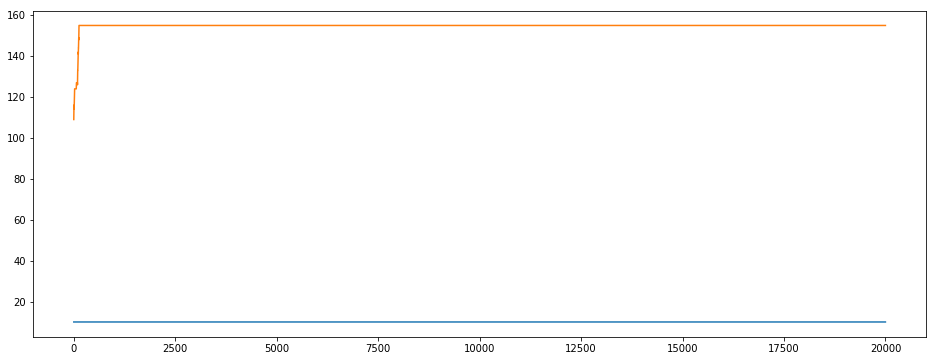

In [13]:
plt.figure(figsize=(16, 6))
plt.plot(first_plant)
plt.plot(last_plant)

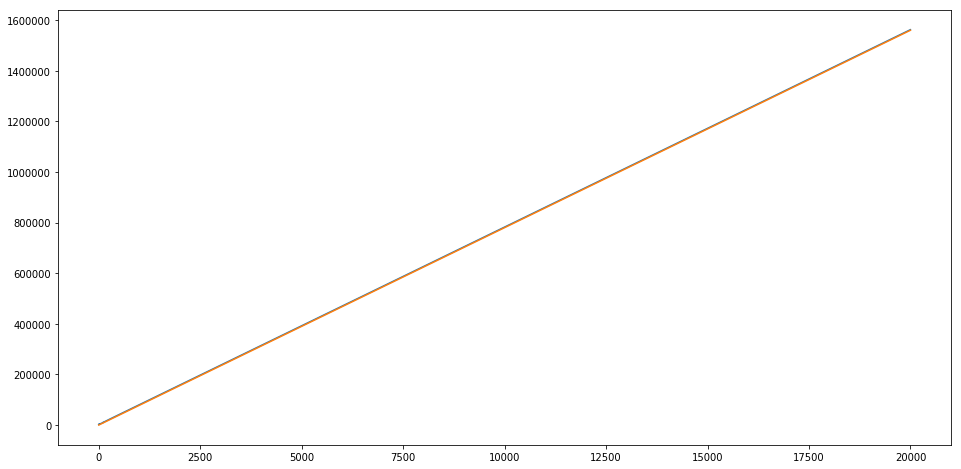

In [14]:
plt.figure(figsize=(16, 8))
plt.plot(scores)
plt.plot([78*i for i in range(len(scores))])

In [15]:
scores[250] + 78*(300 - 250), scores[300]

(25690, 25690)

In [16]:
scores[250] + 78*(500 - 250), scores[500]

(41290, 41290)

In [17]:
scores[500] + 78*(50000000000 - 500 - 1)

3900000002212